# Logistic Regression a classification method of supervised learning

In [ ]:
"""Logistic regression is used if explanatory variables are continuous and response variable being discrete 
or binary (only two possible values) OR If explanatory variables are mix of categorical and continuous variables.
Response variable - called categorical dependent variable
Explanatory variables - called categorical independent variables (predator).

Logistic regressions are two types:
    1. Binary logistic reg (response variable has two states 'yes' or 'No')
    2. Multinomial Logistic reg (response variable has more than two states or categories).
    """

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
data = pd.read_csv('student_records.csv')

In [6]:
data.head()
#data.info()

,admit,gre,gpa,rank
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


### Data Visualization

/home/uib14108/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/uib14108/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, 'Number of students')

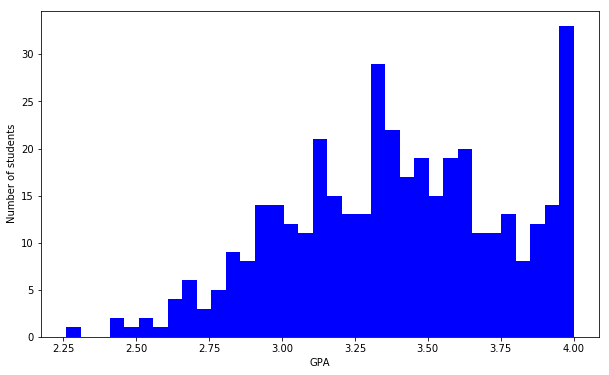

In [7]:
plt.figure(figsize=(10,6))
plt.hist(data['gpa'], bins=35, color='blue')
plt.xlabel('GPA')
plt.ylabel('Number of students')

Text(0, 0.5, 'students')

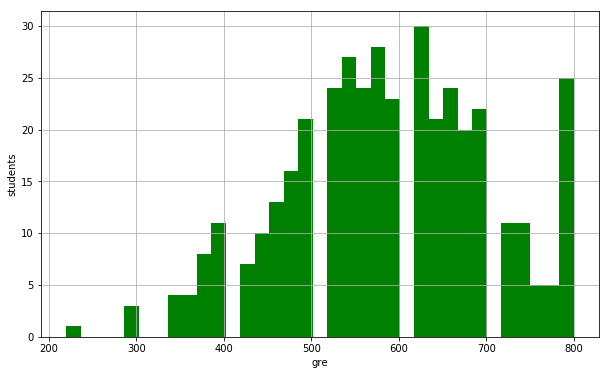

In [8]:
plt.figure(figsize=(10,6))
data['gre'].hist(bins=35, color='green')
plt.xlabel('gre')
plt.ylabel('students')

Text(0, 0.5, 'students')

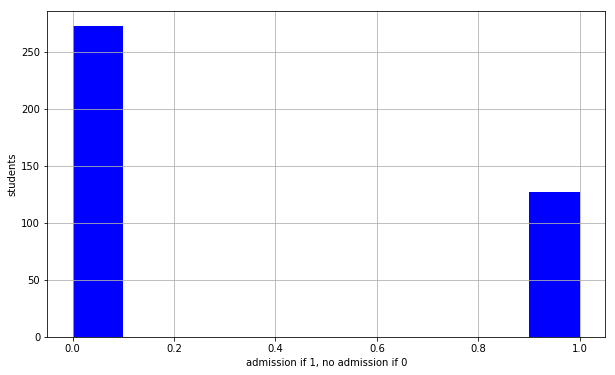

In [9]:
plt.figure(figsize=(10,6))
data['admit'].hist(color='b')
plt.xlabel('admission if 1, no admission if 0')
plt.ylabel('students')

Text(0, 0.5, 'students')

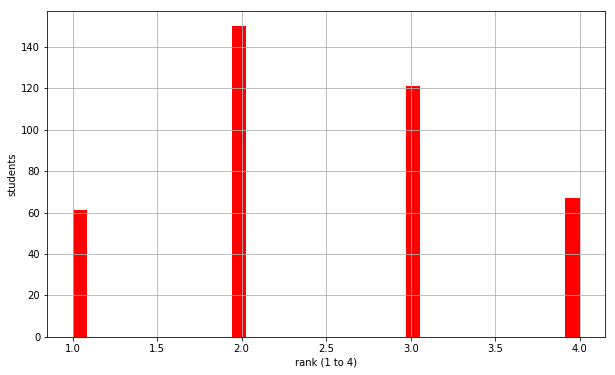

In [10]:
plt.figure(figsize=(10,6))
data['rank'].hist(bins=35, color='red')
plt.xlabel('rank (1 to 4)')
plt.ylabel('students')

/home/uib14108/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


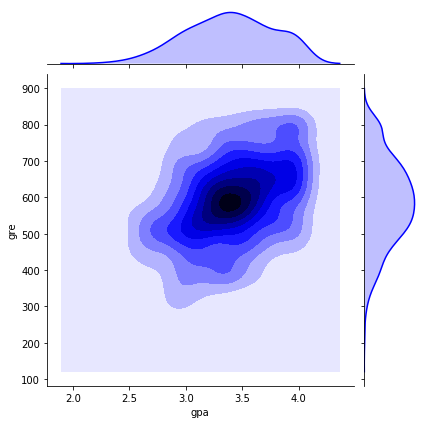

In [11]:
# Correlation between gpa and gre
sns.jointplot(x='gpa', y='gre', data=data, color='blue', kind='kde')

### Create features

In [12]:
#data.head()

In [13]:
# variables may be interdependent, to avoid influence of a variable on other
# exclude a variable (exlude first variable; here rank_1).

In [14]:
# create dummy features for rank
# rank(1,2,3,4)=rank_1, rank_2, rank_3, rank_4
dummy_rank = pd.get_dummies(data['rank'], prefix='rank')

In [15]:
dummy_rank.head()

,rank_1.0,rank_2.0,rank_3.0,rank_4.0
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


### Logistic Regression

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
keep_cols=['admit', 'gre', 'gpa']

In [18]:
df = data[keep_cols].join(dummy_rank.loc[ :,'rank_2.0':'rank_4.0']).dropna()
# rename rank columns
df.rename(columns={'rank_1.0':'rank_1', 'rank_2.0':'rank_2', 'rank_3.0':'rank_3', 
                   'rank_4.0':'rank_4'}, inplace=True)
df['gre'] = df['gre'].astype(int)
#df.head()

In [19]:
X = df[['gre', 'gpa', 'rank_2', 'rank_3', 'rank_4']]
y = df['admit']

In [20]:
X.shape, y.shape

((397, 5), (397,))

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((277, 5), (120, 5), (277,), (120,))

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
model1 = LogisticRegression()

In [25]:
model1.fit(X_train, y_train)

/home/uib14108/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [26]:
prediction1 = model1.predict(X_test)

In [27]:
type(X_test)

pandas.core.frame.DataFrame

### Evaluate model by classification report

In [28]:
from sklearn.metrics import classification_report

In [32]:
classification_report(y_test, prediction1)
# precision is ability of model not to label as positive a sample that is negative, and 
# recall is ability of model to find all positive samples.


'              precision    recall  f1-score   support\n\n           0       0.66      0.86      0.75        80\n           1       0.27      0.10      0.15        40\n\n   micro avg       0.61      0.61      0.61       120\n   macro avg       0.46      0.48      0.45       120\nweighted avg       0.53      0.61      0.55       120\n'

### Build model considering less features (gre, gpa)

In [ ]:
#df.head()

In [ ]:
X = df[['gre', 'gpa']]
y = df['admit']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

In [ ]:
model2 = LogisticRegression()

In [ ]:
model2.fit(X_train, y_train)

In [ ]:
prediction2 = model2.predict(X_test)

In [ ]:
print(classification_report(y_test, prediction1)) # model-1
print()
print(classification_report(y_test, prediction2)) # model-2